In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_csv('gurgaon_properties_cleaned_v2.csv').drop_duplicates()

In [42]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7751.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,South-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7437.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,NaN,1600.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,998.0,Super Built up area 1200(111.48 sq.m.)Built Up...,2,2,2,5.0,North,Relatively New,1200.0,1188.0,998.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101


In [43]:
df.shape

(3677, 23)

In [44]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

### **Price**

<Axes: xlabel='price', ylabel='Count'>

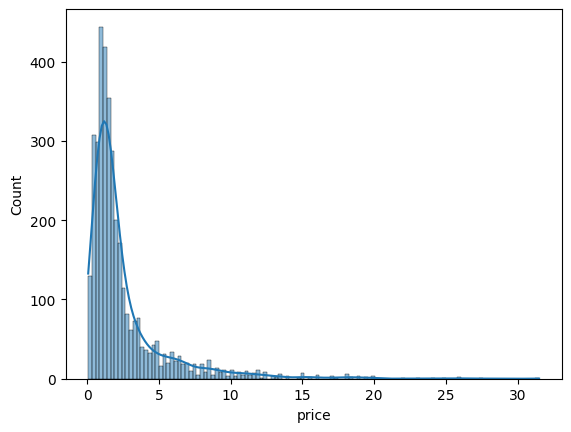

In [45]:
sns.histplot(df.price, kde=True)

<Axes: xlabel='price'>

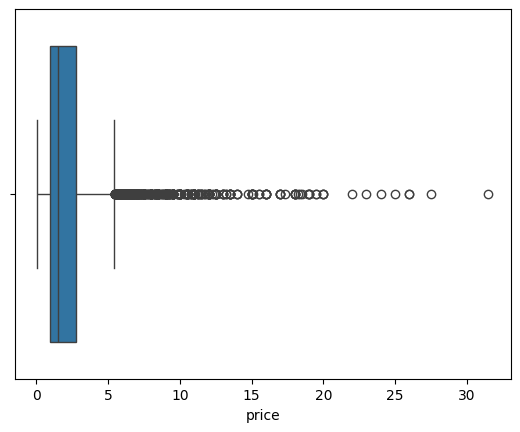

In [46]:
sns.boxplot(x=df['price'])

In [47]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [48]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
220,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,3.0,North-East,Moderately Old,NaN,9000.0,NaN,1,1,1,1,0,2,74
779,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
3137,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72
1866,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
125,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,North,Moderately Old,NaN,1000.0,NaN,1,1,1,1,0,0,0
2242,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2816,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,2.0,South-West,Relatively New,NaN,9000.0,NaN,1,1,1,1,0,1,145
2520,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,3.0,NaN,Moderately Old,NaN,1000.0,NaN,0,1,0,0,0,0,54
2504,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
1157,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,500.0,NaN,0,1,0,0,0,1,31


On the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### **Price_per_sqft**

<Axes: xlabel='price_per_sqft', ylabel='Count'>

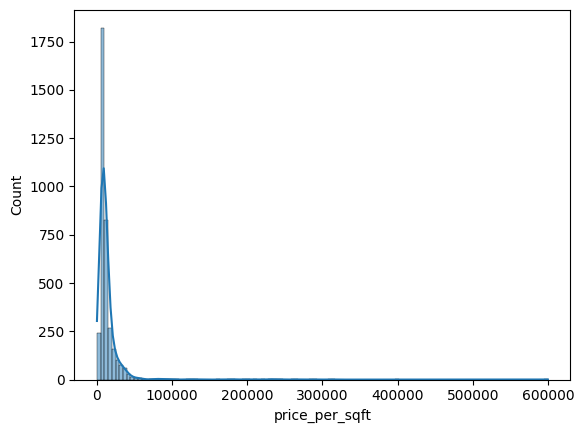

In [49]:
sns.histplot(df.price_per_sqft,kde=True)

<Axes: xlabel='price_per_sqft'>

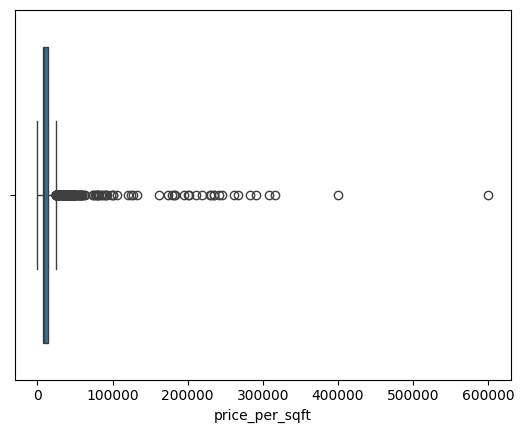

In [50]:
sns.boxplot(x=df['price_per_sqft'])

In [52]:
# Calculate the IQR for the 'price_per_sqft' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [53]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\abhin\AppData\Local\Temp\ipykernel_22440\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [54]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\abhin\AppData\Local\Temp\ipykernel_22440\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [55]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [56]:
df.update(outliers_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

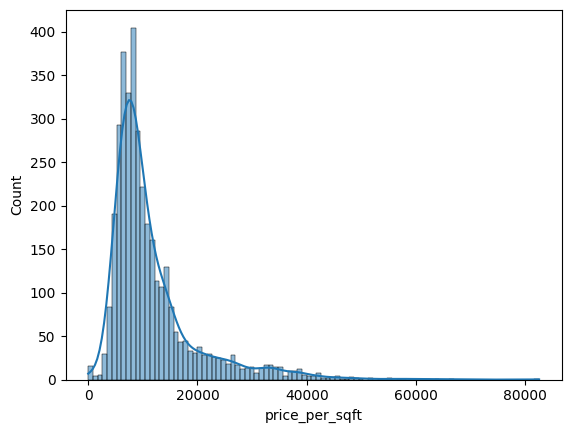

In [57]:
sns.histplot(df.price_per_sqft,kde=True)

<Axes: xlabel='price_per_sqft'>

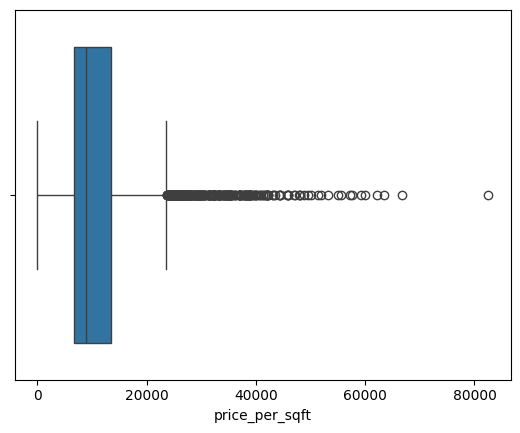

In [58]:
sns.boxplot(x=df['price_per_sqft'])

In [59]:
df[df['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
55,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,4.0,West,New Property,NaN,325.0,300.0,1,1,1,1,0,2,72
276,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,3.0,East,Moderately Old,NaN,3240.0,NaN,1,1,0,1,0,2,75
1070,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,2.0,North,Old Property,NaN,2250.0,NaN,1,1,0,0,0,1,160
1376,house,nul,sector 28,12.50,51440.0,2430.0,Plot area 270(225.75 sq.m.),16,17,3+,4.0,South,Relatively New,NaN,2430.0,NaN,1,1,0,1,1,2,137
1866,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,2.0,North-East,New Property,NaN,4545.0,NaN,1,1,0,1,1,1,138
2242,house,emaar the palm springs,sector 54,24.00,66667.0,3600.0,Plot area 400(37.16 sq.m.),5,5,2,1.0,North-East,Old Property,NaN,400.0,NaN,1,1,0,1,0,1,122
2686,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,1.0,NaN,Undefined,NaN,140.0,NaN,0,0,0,0,0,0,0
2773,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,7.0,NaN,Undefined,NaN,1565.0,NaN,0,0,0,0,0,0,0
3136,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,4.0,North,New Property,NaN,1600.0,NaN,0,0,0,0,0,1,99
3137,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,4.0,North-West,New Property,NaN,400.0,350.0,1,1,1,1,0,2,72


In [60]:
df = df[df['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

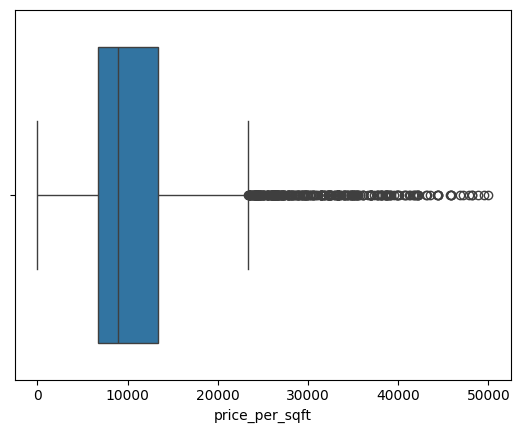

In [61]:
sns.boxplot(x=df['price_per_sqft'])

### **Area**

<Axes: xlabel='area', ylabel='Count'>

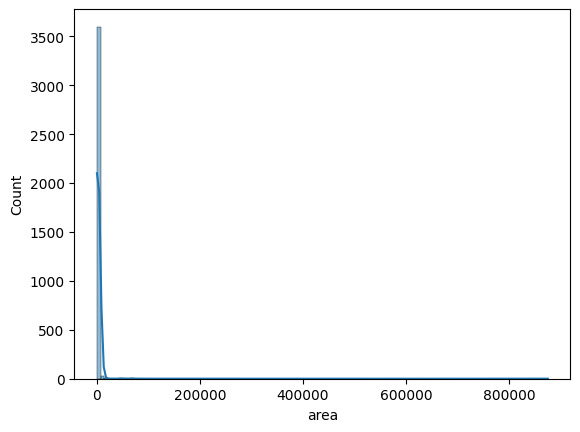

In [62]:
sns.histplot(x = df.area,kde=True)

<Axes: xlabel='area'>

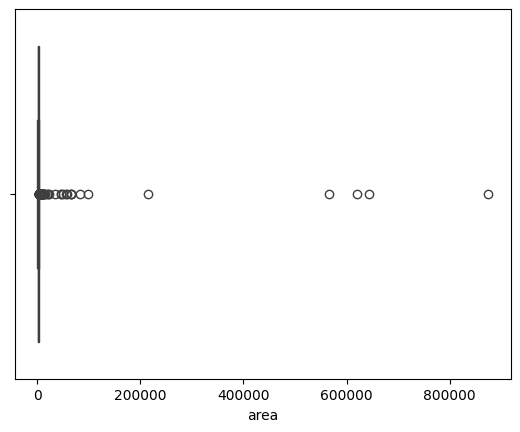

In [63]:
sns.boxplot(x=df['area'])

In [64]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [65]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1617,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,2.0,South-West,New Property,NaN,NaN,569243.0,0,0,0,0,0,0,76
1771,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,1.0,North-East,Relatively New,NaN,NaN,607936.0,1,0,0,0,1,0,65
2994,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,2.0,NaN,New Property,NaN,2.0,NaN,1,1,0,1,1,1,0
3162,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,3.0,North,New Property,NaN,NaN,514396.0,0,0,0,0,0,0,44
3593,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44


In [66]:
df = df[df['area'] < 100000]

<Axes: xlabel='area', ylabel='Count'>

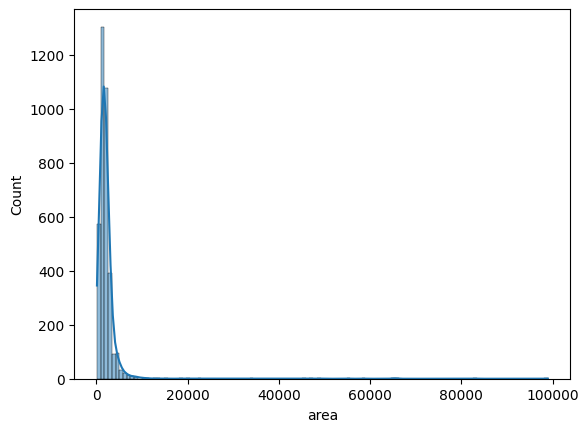

In [67]:
sns.histplot(x = df.area,kde=True)

<Axes: xlabel='area'>

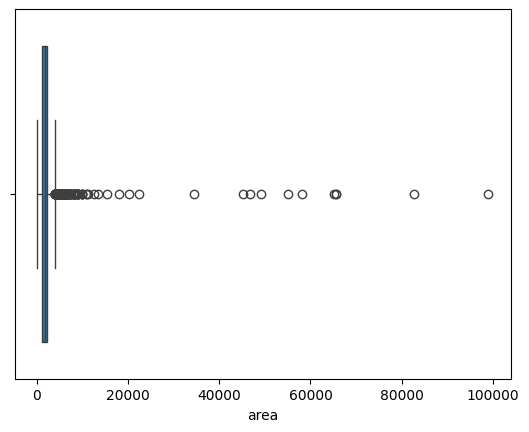

In [68]:
sns.boxplot(x=df['area'])

In [70]:
df[df['area'] > 10000].sort_values('area',ascending=False)

# 88, 3541, 906, 3047, 1127, 1838, 2600, 594, 2317

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
88,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,4.0,South,Relatively New,NaN,NaN,11000.00,0,1,1,1,0,1,60
2302,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
3541,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,12.0,North,Relatively New,NaN,NaN,64412.00,0,0,0,0,0,0,51
906,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,10.0,East,New Property,NaN,NaN,64529.00,1,0,0,0,0,0,15
1159,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
3047,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,0.0,NaN,Under Construction,NaN,NaN,58141.00,0,0,0,0,0,0,15
1127,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,13.0,South-West,Relatively New,NaN,NaN,54917.00,0,0,0,0,0,0,37
1838,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,1.0,North-West,Relatively New,NaN,NaN,48811.00,1,0,0,0,0,0,37
2523,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2600,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,10.0,North-West,Relatively New,NaN,NaN,45966.00,0,0,0,0,1,0,33


In [71]:
df.drop(index=[88, 3541, 906, 3047, 1127, 1838, 2600, 594, 2317], inplace=True)

In [72]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2302,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,3.0,South-East,Old Property,NaN,115.0,NaN,0,0,0,0,1,0,7
1159,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,1.0,NaN,Undefined,NaN,NaN,7250.00,0,0,0,0,0,0,0
2523,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,3.0,North-West,Relatively New,NaN,5800.0,5200.00,0,1,1,0,0,1,109
2192,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,3.0,North-East,New Property,NaN,2660.0,2500.00,0,1,0,0,0,1,61
2437,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,3.0,East,Moderately Old,NaN,2850.0,2250.00,1,1,0,1,1,1,123
1901,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,New Property,NaN,NaN,18122.00,1,0,0,1,1,1,44
1559,house,unitech aspen greens,sector 50,6.95,4490.0,15479.0,Plot area 240(200.67 sq.m.)Built Up area: 2160...,3,3,1,2.0,North-East,Moderately Old,NaN,2160.0,1720.00,0,1,0,0,0,0,160
3524,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,6.0,NaN,New Property,NaN,NaN,1175.11,0,0,0,0,0,0,55
779,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42
2892,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.00,0,1,0,0,0,0,60


In [73]:
df.loc[2302,'area'] = 115*9
df.loc[1159,'area'] = 7250
df.loc[2523,'area'] = 5800
df.loc[2192,'area'] = 2660
df.loc[2437,'area'] = 2850
df.loc[1901,'area'] = 1812
df.loc[1559,'area'] = 2160
df.loc[3524,'area'] = 1175

<Axes: xlabel='area', ylabel='Count'>

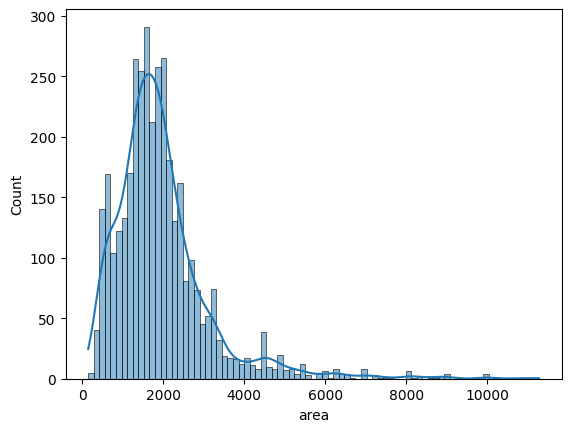

In [74]:
sns.histplot(x = df.area,kde=True)

<Axes: xlabel='area'>

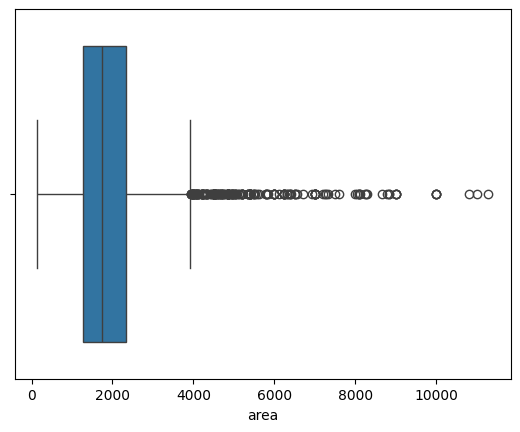

In [75]:
sns.boxplot(x=df['area'])

In [76]:
df['area'].describe()

count     3633.000000
mean      1950.357005
std       1215.707897
min        145.000000
25%       1260.000000
50%       1747.000000
75%       2325.000000
max      11286.000000
Name: area, dtype: float64

### **BedRoom**

<Axes: xlabel='bedRoom', ylabel='Count'>

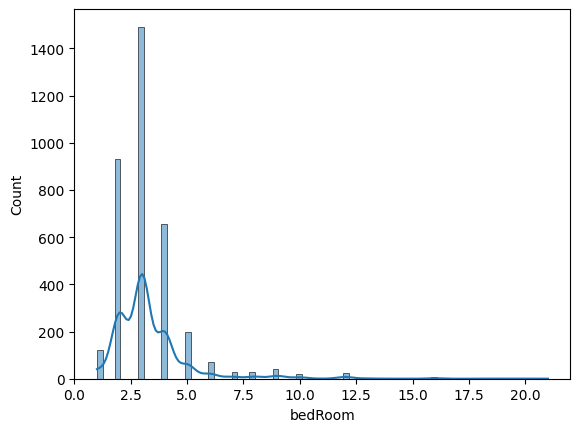

In [77]:
sns.histplot(df.bedRoom,kde=True)

<Axes: xlabel='bedRoom'>

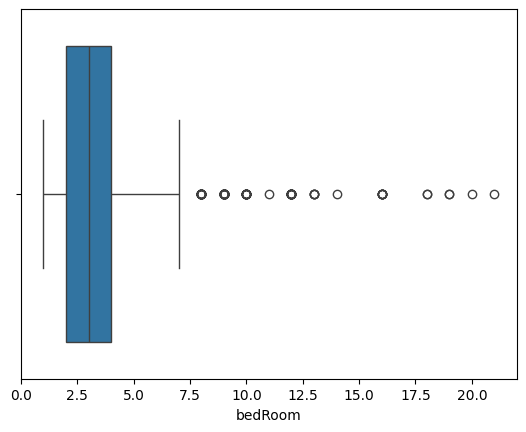

In [78]:
sns.boxplot(x=df['bedRoom'])

In [79]:
df['bedRoom'].describe()

count    3633.000000
mean        3.333609
std         1.830035
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [80]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
697,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,5.0,North,Relatively New,NaN,1161.0,NaN,0,1,0,0,0,2,49
2631,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,4.0,East,Relatively New,NaN,1152.0,NaN,0,1,0,0,0,2,22
96,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,4.0,North-West,Relatively New,NaN,1622.0,NaN,1,1,1,1,0,0,74
1272,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,5.0,North-West,Relatively New,NaN,7500.0,NaN,1,0,1,0,0,0,68
2640,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,4.0,North-East,Relatively New,NaN,1503.0,NaN,0,0,0,0,1,2,57
2864,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1735,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,4.0,NaN,New Property,NaN,3078.0,NaN,1,1,1,1,0,1,0
1406,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,4.0,West,New Property,NaN,2700.0,NaN,0,1,0,1,0,1,49
2504,house,dlf city plots,sector 26,20.00,44267.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,4.0,North-East,New Property,NaN,4518.0,NaN,1,1,1,1,0,1,153
1949,house,independent,sector 11,4.50,25000.0,1800.0,Plot area 200(167.23 sq.m.),16,16,3+,4.0,South,Relatively New,NaN,1800.0,NaN,0,0,0,0,0,1,20


In [81]:
df = df[df['bedRoom'] <= 10]

In [82]:
df.shape

(3588, 23)

<Axes: xlabel='bedRoom', ylabel='Count'>

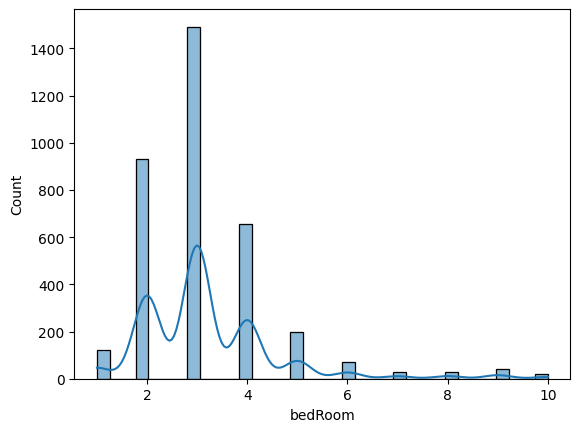

In [83]:
sns.histplot(df.bedRoom,kde=True)

<Axes: xlabel='bedRoom'>

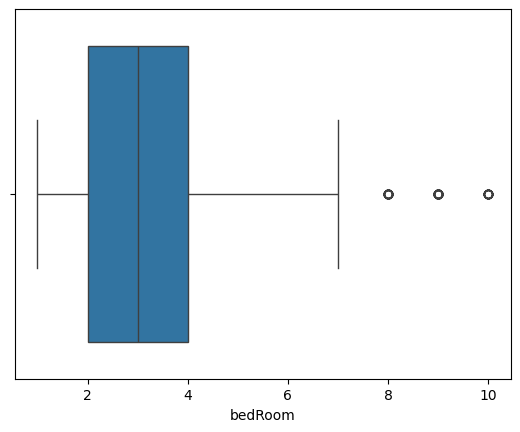

In [84]:
sns.boxplot(x=df['bedRoom'])

In [85]:
df['bedRoom'].describe()

count    3588.000000
mean        3.203735
std         1.393968
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

## **BathRoom**

<Axes: xlabel='bathroom', ylabel='Count'>

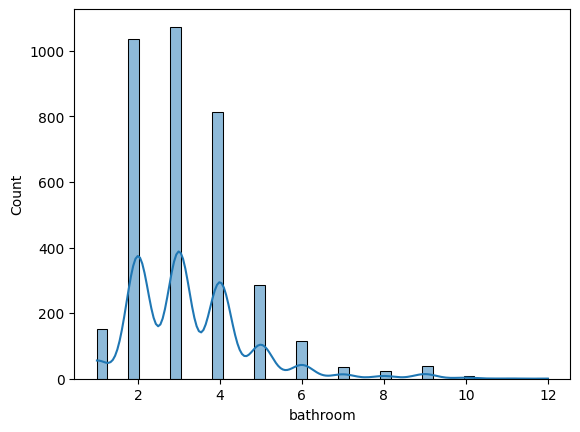

In [86]:
sns.histplot(df.bathroom,kde=True)

<Axes: xlabel='bathroom'>

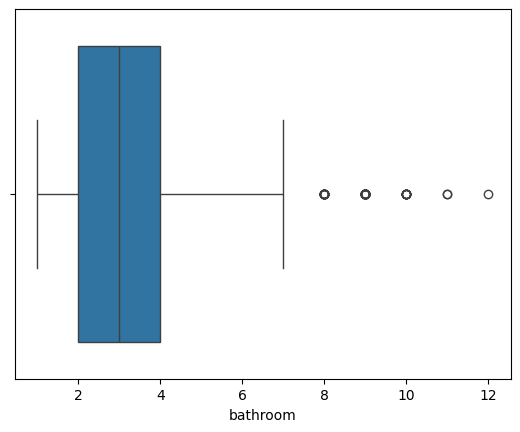

In [87]:
sns.boxplot(x=df['bathroom'])

In [88]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1378,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,3.0,North-East,Relatively New,NaN,6390.0,NaN,0,1,0,0,0,1,146
1245,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,3.0,East,Old Property,NaN,5000.0,NaN,1,1,0,1,1,1,39
1794,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,4.0,South-East,Relatively New,NaN,7000.0,NaN,0,0,0,1,0,2,38


In [89]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7751.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,South-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7437.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,NaN,1600.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,998.0,Super Built up area 1200(111.48 sq.m.)Built Up...,2,2,2,5.0,North,Relatively New,1200.0,1188.0,998.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101


### **Super Builtup Area**

<Axes: xlabel='super_built_up_area', ylabel='Count'>

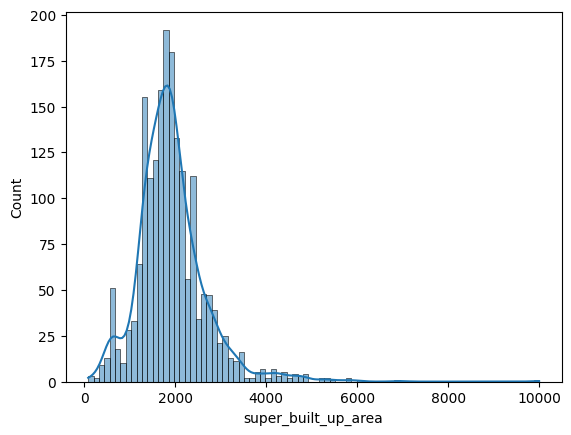

In [90]:
sns.histplot(df.super_built_up_area,kde=True)

<Axes: xlabel='super_built_up_area'>

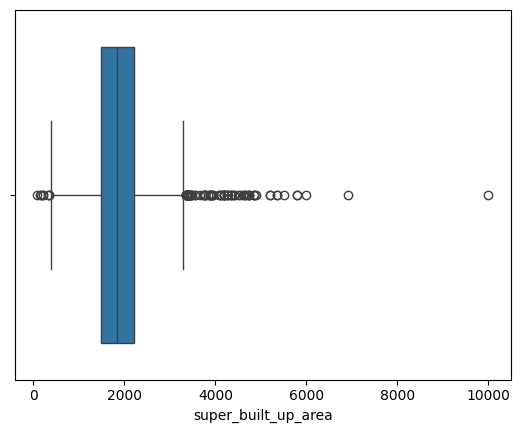

In [91]:
sns.boxplot(x=df['super_built_up_area'])

In [92]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [93]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1704,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,NaN,NaN,0,1,0,1,1,0,49
3124,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,19.0,North,Relatively New,6926.0,NaN,NaN,0,1,0,0,0,1,140


### **Built-up Area**

<Axes: xlabel='built_up_area', ylabel='Count'>

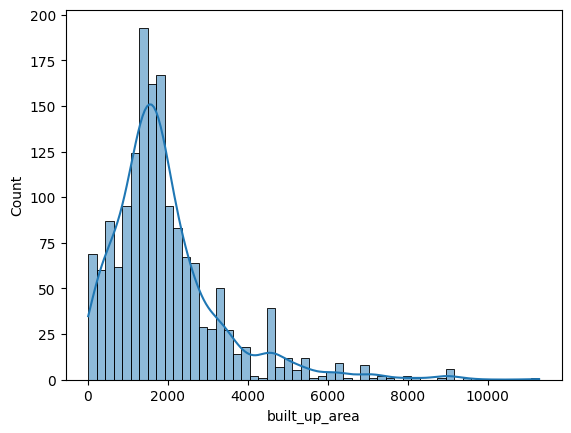

In [94]:
sns.histplot(df.built_up_area,kde=True)

<Axes: xlabel='built_up_area'>

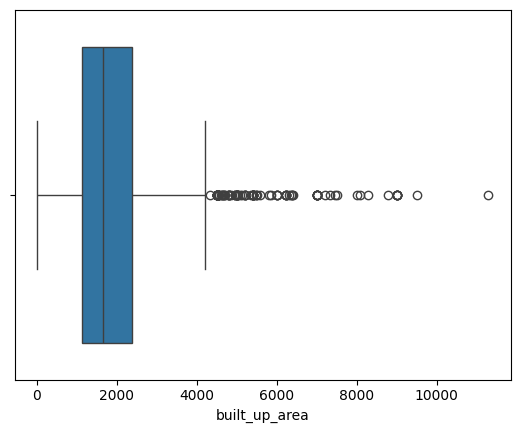

In [95]:
sns.boxplot(x=df['built_up_area'])

In [96]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
779,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,3.0,North-East,Relatively New,NaN,11286.0,NaN,1,1,0,1,1,1,42


### **Carpet Area**

<Axes: xlabel='carpet_area', ylabel='Count'>

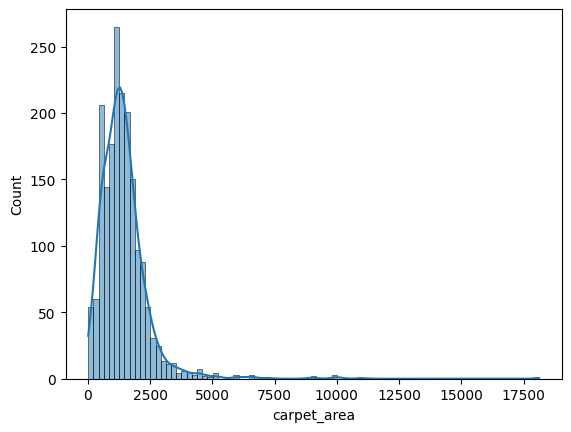

In [97]:
sns.histplot(df.carpet_area,kde=True)

<Axes: xlabel='carpet_area'>

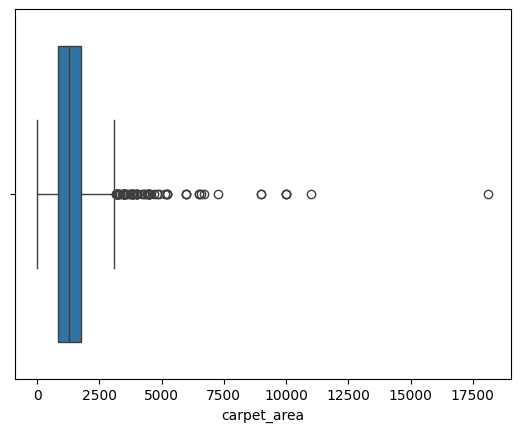

In [98]:
sns.boxplot(x=df['carpet_area'])

In [99]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1901,flat,godrej air,sector 85,2.5,1379.0,1812.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,16.0,North-East,New Property,NaN,NaN,18122.0,1,0,0,1,1,1,44
2892,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [100]:
df.loc[1901,'carpet_area'] = 1812

In [101]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2892,flat,m3m golfestate,sector 65,13.2,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,13.0,North,Moderately Old,NaN,NaN,11000.0,0,1,0,0,0,0,60


In [102]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7751.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,South-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7437.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,NaN,1600.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,998.0,Super Built up area 1200(111.48 sq.m.)Built Up...,2,2,2,5.0,North,Relatively New,1200.0,1188.0,998.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101


### **Luxury Score**

<Axes: xlabel='luxury_score', ylabel='Count'>

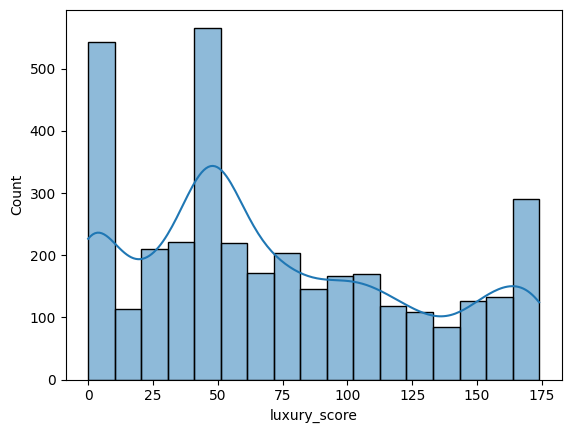

In [103]:
sns.histplot(df.luxury_score,kde=True)

<Axes: xlabel='luxury_score'>

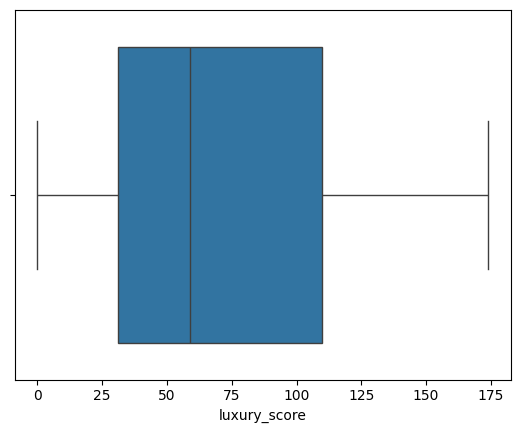

In [106]:
sns.boxplot(x=df.luxury_score)

In [107]:
df.shape

(3588, 23)

### **Price Per Sqft**

<Axes: xlabel='price_per_sqft', ylabel='Count'>

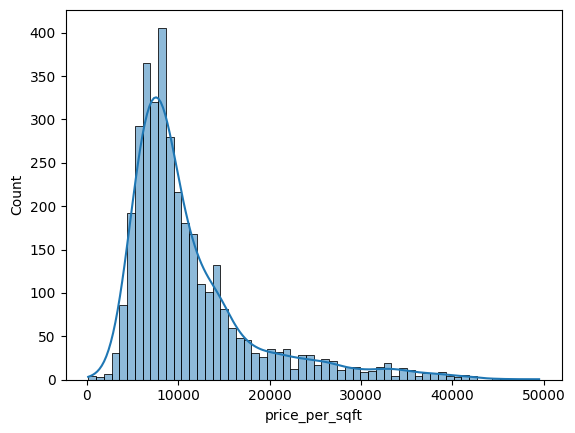

In [108]:
sns.histplot(df.price_per_sqft,kde=True)

<Axes: xlabel='price_per_sqft'>

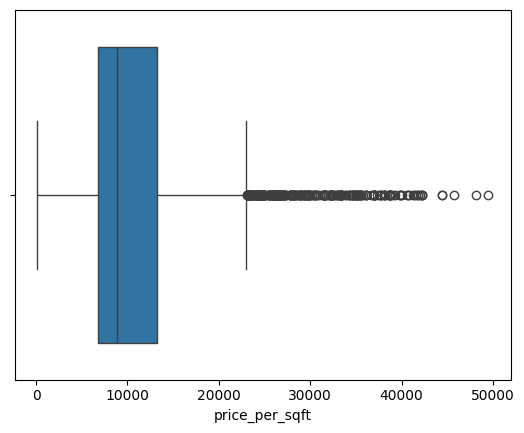

In [109]:
sns.boxplot(x=df['price_per_sqft'])

In [111]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

In [113]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7752.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,South-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7438.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,NaN,1600.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,998.0,Super Built up area 1200(111.48 sq.m.)Built Up...,2,2,2,5.0,North,Relatively New,1200.0,1188.0,998.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101


<Axes: xlabel='price_per_sqft', ylabel='Count'>

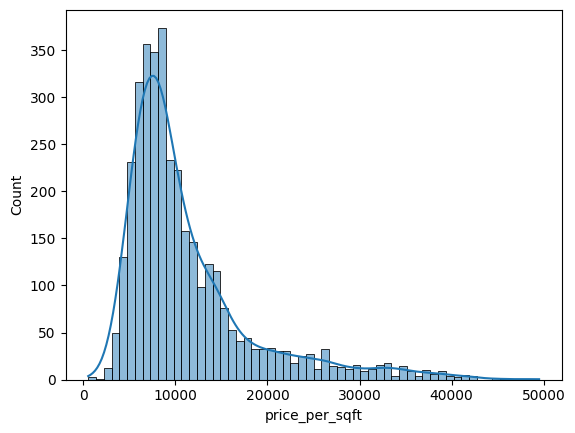

In [114]:
sns.histplot(df.price_per_sqft,kde=True)

<Axes: xlabel='price_per_sqft'>

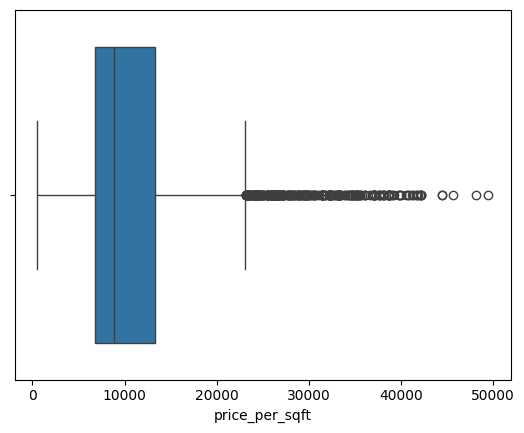

In [115]:
sns.boxplot(x=df['price_per_sqft'])

In [112]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
151,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,3.0,East,Moderately Old,NaN,4500.0,NaN,1,1,1,1,0,1,103
462,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44
572,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,2.0,North-East,Relatively New,NaN,300.0,250.0,0,1,0,1,0,1,88
1189,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,2,97
1299,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,3.0,North,Undefined,NaN,2000.0,1800.0,0,0,0,0,0,0,0
1554,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,NaN,NaN,Relatively New,NaN,2844.0,NaN,1,1,1,1,0,2,0
1914,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,2.0,East,Relatively New,NaN,4518.0,NaN,1,1,0,0,0,1,121
3163,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,4.0,North,New Property,NaN,2700.0,NaN,0,0,0,1,0,1,7
3728,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,4.0,East,Relatively New,NaN,2844.0,NaN,0,1,1,1,0,1,60


In [120]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05)

np.float64(250.5)

In [121]:
df[(df['area']/df['bedRoom'])<250].sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
506,flat,gls arawali homes,sohna road,0.30,6237.0,481.0,Super Built up area 567(52.68 sq.m.)Carpet are...,2,2,2,4.0,East,Relatively New,567.0,NaN,480.53,0,0,0,0,0,2,120
1221,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.00,0,0,0,0,0,0,0
2675,house,iffco nagar and 17b rwa,sector 17,3.50,24306.0,1440.0,Plot area 1440(133.78 sq.m.),6,5,3,3.0,East,Old Property,NaN,1440.0,NaN,0,0,0,0,0,0,44
2870,house,independent,sector 17,3.50,24306.0,1440.0,Built Up area: 160 (14.86 sq.m.),6,6,3+,3.0,North-West,Undefined,NaN,160.0,NaN,0,0,0,0,0,0,0
2945,house,independent,sector 12,1.00,8230.0,1215.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 ...,9,7,3+,3.0,North,Moderately Old,NaN,3750.0,NaN,0,0,1,1,0,0,7


In [124]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [130]:
df_outliars = df[(df.area_room_ratio<250) & (df.bedRoom >3)]

In [131]:
df_outliars.to_csv('outliars_price_per_sqft.csv')

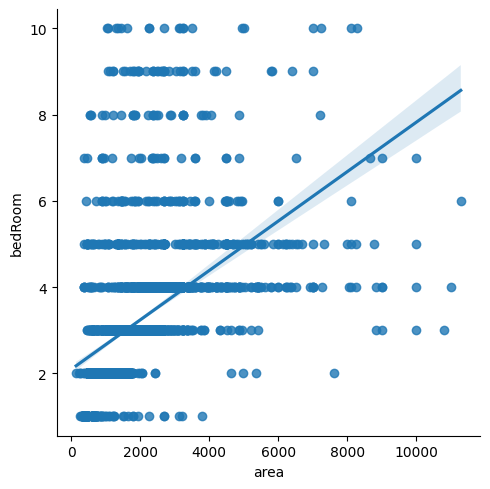

In [127]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [128]:
df[df.area_room_ratio < 250]['bedRoom'].value_counts()

bedRoom
2     47
3     33
5     28
4     17
6     17
9     15
8     12
7      8
10     8
Name: count, dtype: int64

In [129]:
# Removing those data ppoints where area_room_ratio <100

df = df[df.area_room_ratio > 100]

In [132]:
# Where the area < 250 and rooms >3 , transformation is applied
# Teansformation- > rooms/floor and then calculated the area per room

df_outliars.bedRoom = round(df_outliars.bedRoom/df_outliars.floorNum)

C:\Users\abhin\AppData\Local\Temp\ipykernel_22440\2540806994.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliars.bedRoom = round(df_outliars.bedRoom/df_outliars.floorNum)


In [133]:
df_outliars

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
120,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5.0,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
133,house,sheetla enclave,sector 5,0.96,10000.0,960.0,Plot area 945(87.79 sq.m.),2.0,4,2,3.0,NaN,Moderately Old,NaN,945.0,NaN,0,0,1,1,0,1,0,137.142857
278,house,independent,sector 12,1.20,14184.0,846.0,Plot area 846(78.6 sq.m.)Built Up area: 846 sq...,2.0,4,2,2.0,North,Relatively New,NaN,846.0,NaN,0,0,0,1,0,1,7,211.500000
431,house,independent,sector 38,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),2.0,7,3+,3.0,North-East,Relatively New,NaN,900.0,NaN,1,0,1,1,0,0,27,128.571429
462,house,independent,sector 55,5.00,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,2.0,9,3+,5.0,East,New Property,NaN,115.0,100.0,0,0,0,0,1,1,44,125.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,house,independent,sector 43,5.30,27390.0,1935.0,Plot area 215(179.77 sq.m.),3.0,9,3+,3.0,East,Moderately Old,NaN,1935.0,NaN,0,1,0,0,0,1,71,215.000000
3659,house,independent,sector 21,0.60,6173.0,972.0,Plot area 108(90.3 sq.m.),3.0,3,2,3.0,NaN,Old Property,NaN,972.0,NaN,0,0,0,0,0,0,0,121.500000
3698,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9.0,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
3736,house,dlf city plots phase 2,sector 25,6.50,33592.0,1935.0,Plot area 215(179.77 sq.m.),3.0,9,3+,3.0,West,Old Property,NaN,1935.0,NaN,1,1,1,1,0,1,142,215.000000


In [134]:
df.update(df_outliars)

In [135]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [136]:
df[(df.area_room_ratio<250) & (df.bedRoom >4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
120,house,independent,sector 17,0.32,5664.0,565.0,Built Up area: 565 (52.49 sq.m.),5,1,0,1.0,NaN,Undefined,NaN,565.0,NaN,0,0,0,0,0,0,0,113.000000
914,house,independent,manesar,1.10,6173.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
1032,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1094,house,independent,manesar,0.80,6667.0,1200.0,Plot area 1200(111.48 sq.m.),8,8,2,1.0,NaN,Relatively New,NaN,1200.0,NaN,0,0,0,0,0,0,0,150.000000
1221,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
1659,house,independent,sector 11,3.50,15556.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1856,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
2134,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
2227,house,independent,sector 3 phase 2,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
2355,house,independent,sector 12,2.50,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000


Since in these cases only 1 floor was there, the area per bedroom even after taking into account the floors, the area was not realistic, hence the points are also dropped

In [137]:
df.shape

(3568, 24)

In [138]:
df = df[~((df.area_room_ratio <250 ) & (df.bedRoom > 4))]

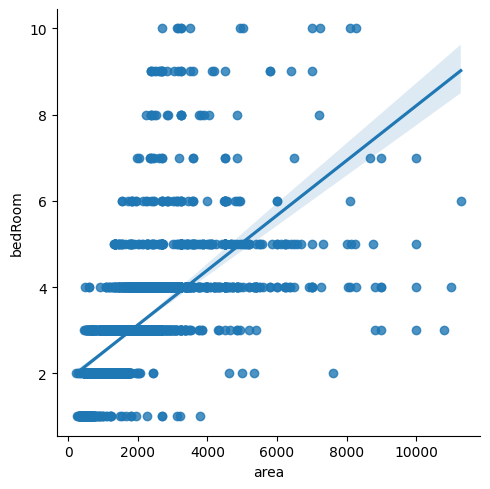

In [139]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [140]:
df.shape

(3555, 24)

In [141]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global solera,sector 107,0.50,7752.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,6.0,South-East,Relatively New,NaN,NaN,645.0,0,0,0,0,1,0,15,215.000000
1,flat,green court,sector 90,0.47,6812.0,690.0,Carpet area: 690 (64.1 sq.m.),2,2,1,0.0,East,New Property,NaN,NaN,690.0,0,0,0,0,0,0,49,345.000000
2,flat,vatika gurgaon,sector 83,1.19,7438.0,1600.0,Carpet area: 1600 (148.64 sq.m.),3,3,2,10.0,South,Relatively New,NaN,NaN,1600.0,0,1,0,0,0,1,35,533.333333
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,998.0,Super Built up area 1200(111.48 sq.m.)Built Up...,2,2,2,5.0,North,Relatively New,1200.0,1188.0,998.0,0,0,0,1,0,1,82,499.000000
4,flat,emaar digihomes,sector 62,2.15,14257.0,1508.0,Carpet area: 1508 (140.1 sq.m.),2,2,3,31.0,NaN,Under Construction,NaN,NaN,1508.0,0,0,0,0,0,0,101,754.000000


In [142]:
df.to_csv('gurgaon_properties_outliar_treated.csv',index=False)